This notebook is a template for generating an inital data summary for a project associated with QIM. A html of the notebook, without the code, can be generated by:
1. Exporting the notebook as html
2. Run python scripts/stripCodeFromHtml htmlfile -o outfile

# PROJECT NAME
* Project owner:
* Affiliation:
* email: 
* QIM contact: 

Short description of the project


In [1]:
# Import modules
from qimtools import inspection, visualization
import dxchange.reader as dxreader

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
# Read data THIS WILL NEED TO BE ADAPTED TO EACH PROJECT
tiff_path = '/home/hektor/snic2020-6-90/QIM_2020_LU_SteveDCI_Metal/MA3615/DCI_1_pag_200-800_16bit.tiff'
volume = dxreader.read_tiff(tiff_path)

## Metadata and statistics of the volume

In [3]:
meta = inspection.volume_meta_information(volume)
stats = inspection.volume_statistics(volume)
for a in [meta,stats]:
    s=inspection.pp_info(a)
    print(s)

Datatype          : uint16
Elementsize       : 2 bytes
Volume dimensions : 600 x 1000 x 1000
Voxels            : 600,000,000
Volume size       : 1.2 GB

Range      : (0, 65535)
Median     : 48,325.00
Mean       : 41,035.62
Non-zero   : 599,999,999
Non-zero % : 100.00



## Representative slices

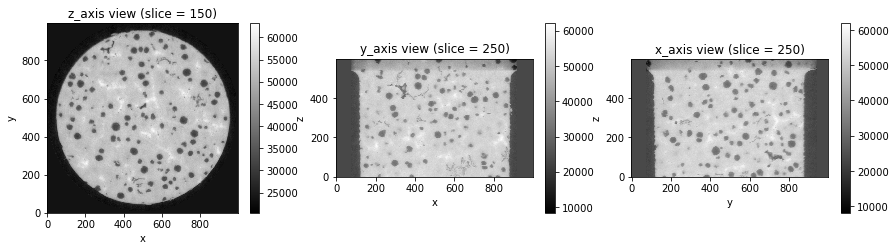

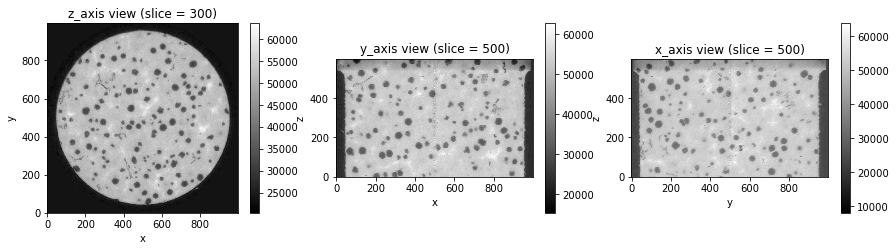

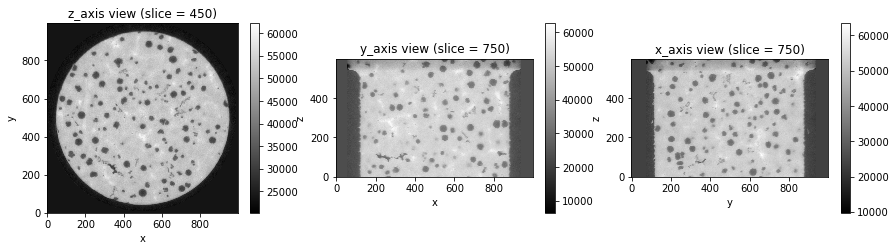

In [4]:
z,y,x = volume.shape
visualization.plot_orthogonal_slices(volume,z//4,y//4,x//4)
visualization.plot_orthogonal_slices(volume,z//2,y//2,x//2)
visualization.plot_orthogonal_slices(volume,3*z//4,3*y//4,3*x//4)

## Histogram of the volume

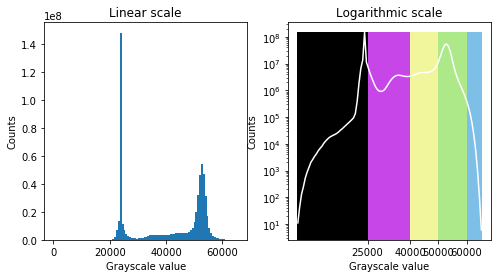

In [5]:
hist,be = np.histogram(volume.flatten(),bins=100)
bc = (be[1:] + be[:-1])/2 #bin centers (arithmetic mean)
fig,axes=plt.subplots(1,2,figsize=(8,4))
ax = axes.ravel()
ax[0].hist(volume.flatten(),bins=100)
ax[0].set_title('Linear scale')
ax[1].semilogy(bc,hist,color='w')
ax[1].set_title('Logarithmic scale')
for a in ax:
    a.set_xlabel('Grayscale value')
    a.set_ylabel('Counts')

bkg = 25000 #background
ths = [40000,50000,60000]
ncolors = len(ths)+2
cmap = visualization.rand_cmap(ncolors,type='bright',verbose=False)
yh = [0,hist.max()]
alpha = 1
ax[1].fill_betweenx(yh,0,bkg,alpha=alpha,color=cmap(0))
for i,th in enumerate(ths):
    if i==0:
        ax[1].fill_betweenx(yh,bkg,th,alpha=alpha,color=cmap((i+1)/ncolors))
    else:
        ax[1].fill_betweenx(yh,ths[i-1],th,alpha=alpha,color=cmap((i+1)/ncolors))
    if i== len(ths)-1:
        ax[1].fill_betweenx(yh,ths[-1],bc.max(),alpha=alpha,color=cmap((i+2)/ncolors))
ax[1].set_xticks([bkg,*ths])
_=ax[1].set_xticklabels([bkg,*ths])
        

## Thresholded slices

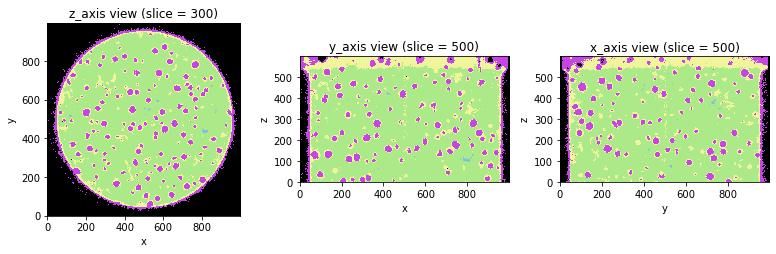

In [6]:
sample = volume>bkg
labels = np.zeros(volume.shape)
for i, th in enumerate(ths):
    if i == 0:
        cond = sample & (volume < th)
    else:    
        cond = sample & (volume>ths[i-1]) & (volume<th)
    labels += (i+1)*cond
    if i == len(ths)-1:
        labels += (i+2)*(sample & (volume>th))     

fig, axes = plt.subplots(ncols=3, figsize=(11, 3.5) )
ax = axes.ravel()
ax[0].imshow(labels[z//2],cmap=cmap,origin='lower')
ax[0].set_title('z_axis view (slice = ' + str(z//2) + ')')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].imshow(labels[:,x//2,:],cmap=cmap,origin='lower')
ax[1].set_title('y_axis view (slice = ' + str(y//2) + ')')
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
im2=ax[2].imshow(labels[:,:,y//2],cmap=cmap,origin='lower')
ax[2].set_title('x_axis view (slice = ' + str(x//2) + ')')
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')

fig.tight_layout()

## Suggestions